In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

In [2]:
display(stud_math.head(10))
stud_math.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
stud_math = pd.read_csv('stud_math.csv')
stud_math.columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
                     'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'studytime_granular',
                     'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']
columns = stud_math.columns
stud_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [4]:
# т. к. нужно узнать что повлияло на итоговые оценки будем исходить из переменной score

In [5]:
pd.DataFrame(stud_math.score.value_counts())# Посмотрим, сколько оценок содержит наш датасет

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


In [6]:
display(pd.DataFrame(stud_math.score.value_counts()))
print("Значений, встретившихся в столбце более 5 раз:"
      , (stud_math.score.value_counts()>5).sum())
stud_math.loc[:, ['score']].info()

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


Значений, встретившихся в столбце более 5 раз: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [7]:
pd.DataFrame(stud_math.absences.value_counts())

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


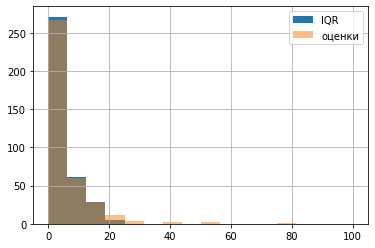

In [8]:
median = stud_math.absences.median()
IQR_2 = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR_2), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR_2, l=perc75 + 1.5*IQR_2))
stud_math.absences.loc[stud_math.absences.between(perc25 - 1.5*IQR_2, perc75 + 1.5*IQR_2)].hist(bins=16, range=(0, 100),
                                                                                  label='IQR')
stud_math.absences.loc[stud_math.score <= 100].hist(alpha=0.5, bins=16, range=(
    0, 100),
                                            label='оценки')
plt.legend()

In [9]:
stud_math = stud_math.loc[stud_math.absences.between(perc25 - 1.5*IQR_2, perc75 + 1.5*IQR_2)]

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


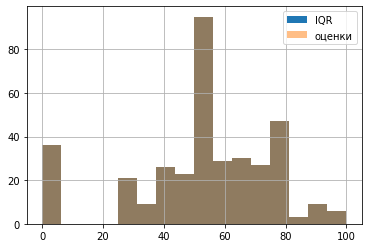

In [10]:
median = stud_math.score.median()
IQR = stud_math.score.quantile(0.75) - stud_math.score.quantile(0.25)
perc25 = stud_math.score.quantile(0.25)
perc75 = stud_math.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_math.score.loc[stud_math.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(0, 100),
                                                                                  label='IQR')
stud_math.score.loc[stud_math.score <= 100].hist(alpha=0.5, bins=16, range=(
    0, 100),
                                            label='оценки')
plt.legend()

In [11]:
# Этот способ позволил нам отобрать экстремально низкие и экстремально высокие оценки
stud_math = stud_math.loc[stud_math.score.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

count    361.000000
mean      16.637119
std        1.259919
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

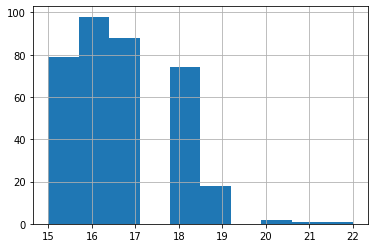

In [12]:
stud_math.age.hist()
stud_math.age.describe()

In [13]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.164627,-0.140522,0.072970,0.000417,0.179170,-0.000417,0.055620,0.043196,0.127582,-0.064051,0.155469,-0.159306
Medu,-0.164627,1.000000,0.263673,-0.189973,0.087904,-0.240567,-0.087904,-0.007513,0.041438,0.058623,-0.055584,0.066439,0.210257
Fedu,-0.140522,0.263673,1.000000,0.042468,0.056674,-0.151912,-0.056674,0.045546,-0.064201,-0.026953,0.024850,-0.016666,0.069961
traveltime,0.072970,-0.189973,0.042468,1.000000,-0.097291,0.064499,0.097291,-0.031219,-0.012274,0.022589,0.001935,-0.050613,-0.074045
studytime,0.000417,0.087904,0.056674,-0.097291,1.000000,-0.176952,-1.000000,0.037365,-0.139698,-0.036747,-0.089648,-0.075454,0.113113
failures,0.179170,-0.240567,-0.151912,0.064499,-0.176952,1.000000,0.176952,-0.017579,0.088810,0.080343,0.099425,0.076537,-0.329542
studytime_granular,-0.000417,-0.087904,-0.056674,0.097291,-1.000000,0.176952,1.000000,-0.037365,0.139698,0.036747,0.089648,0.075454,-0.113113
famrel,0.055620,-0.007513,0.045546,-0.031219,0.037365,-0.017579,-0.037365,1.000000,0.177400,0.091217,0.073872,-0.102630,0.063205
freetime,0.043196,0.041438,-0.064201,-0.012274,-0.139698,0.088810,0.139698,0.177400,1.000000,0.286959,0.040573,0.096281,0.034952
goout,0.127582,0.058623,-0.026953,0.022589,-0.036747,0.080343,0.036747,0.091217,0.286959,1.000000,0.005389,0.113048,-0.122246


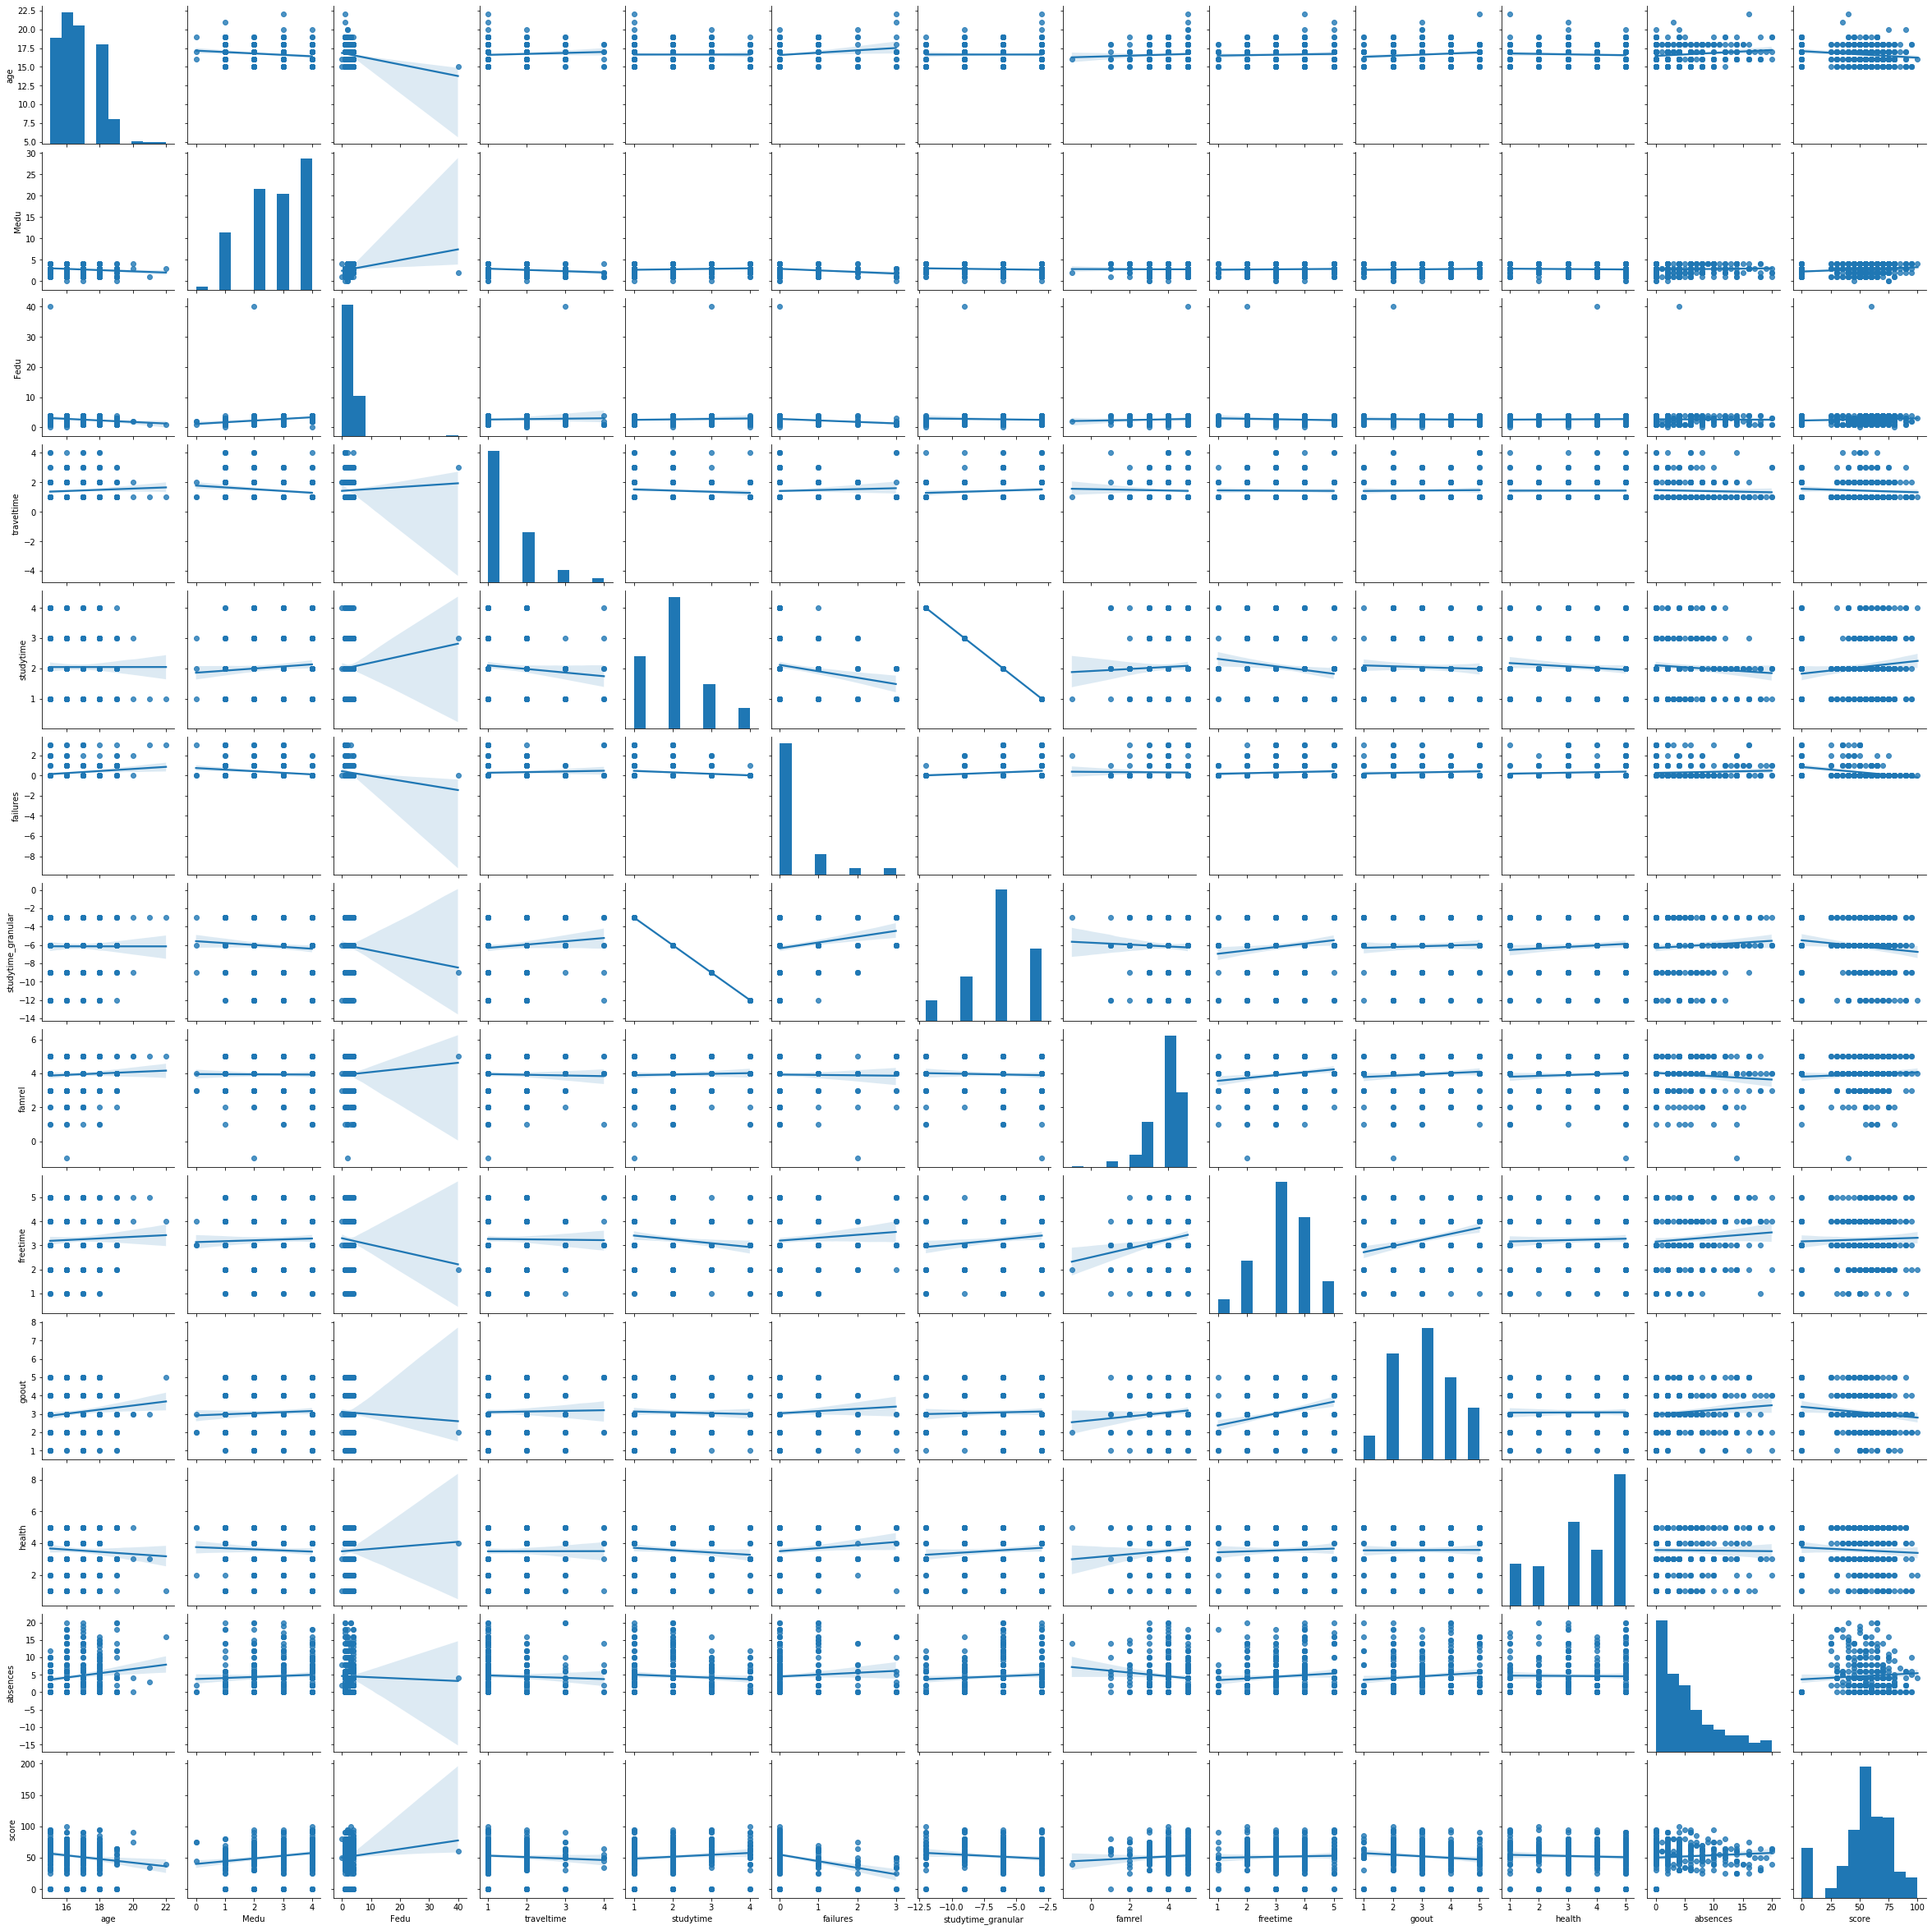

In [14]:
sns.pairplot(stud_math, kind = 'reg')

In [15]:
#Корреляция Medu == Fedu == score убираем Fedu и Medu, studytime_granular == freetime убираем freetime, goout == absences убираем absences

In [16]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='age', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

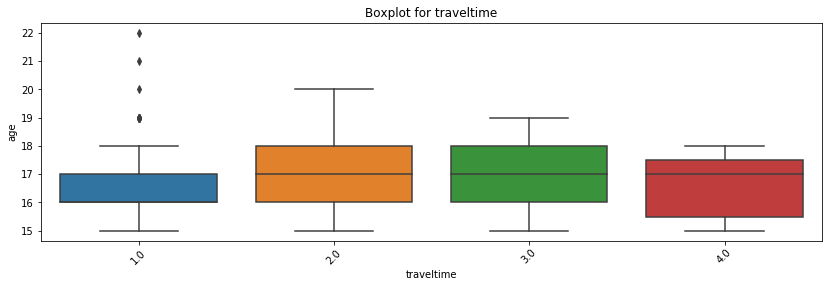

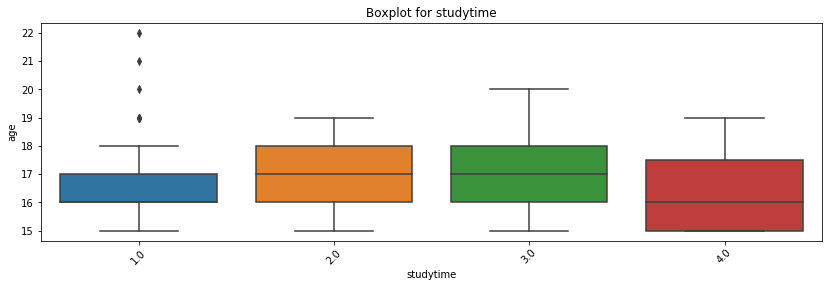

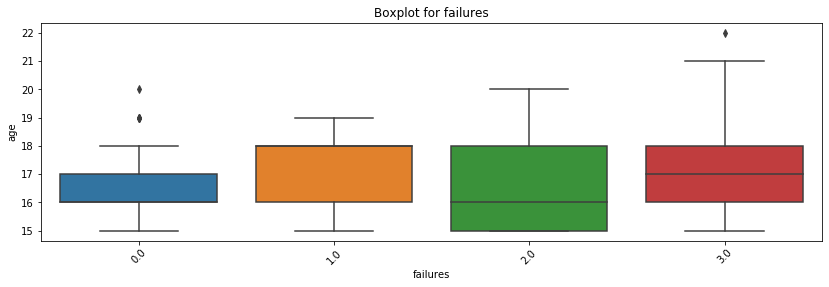

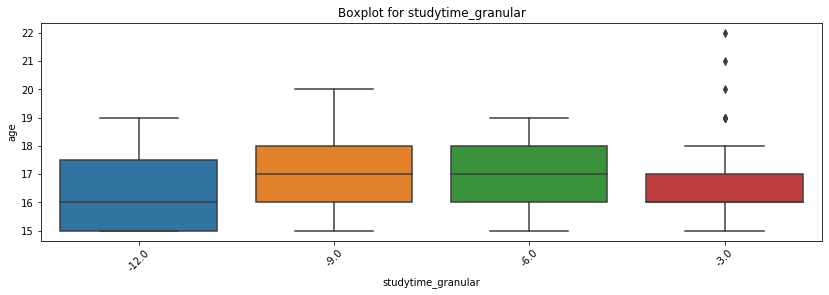

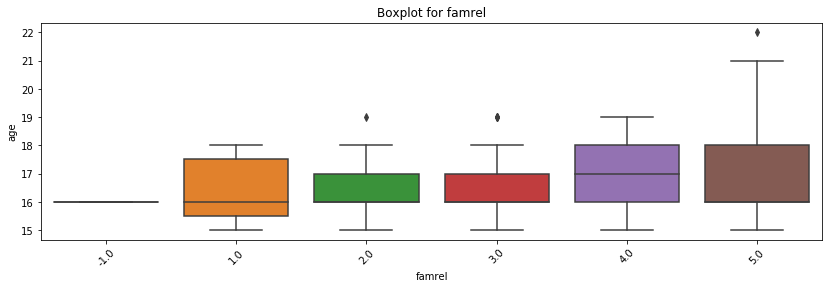

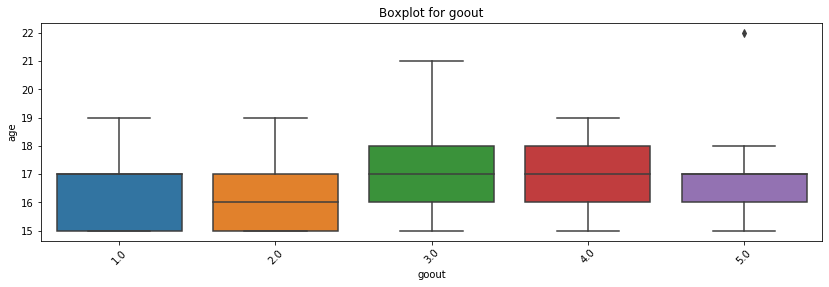

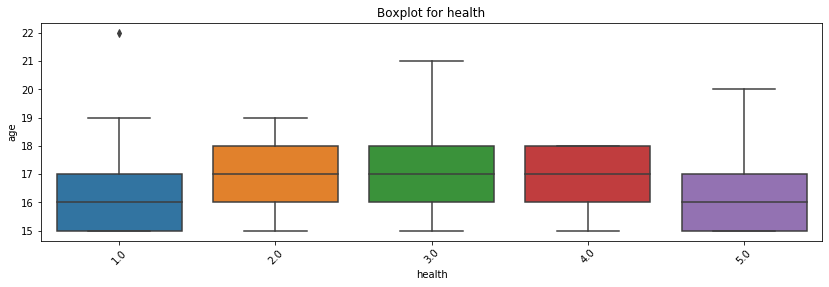

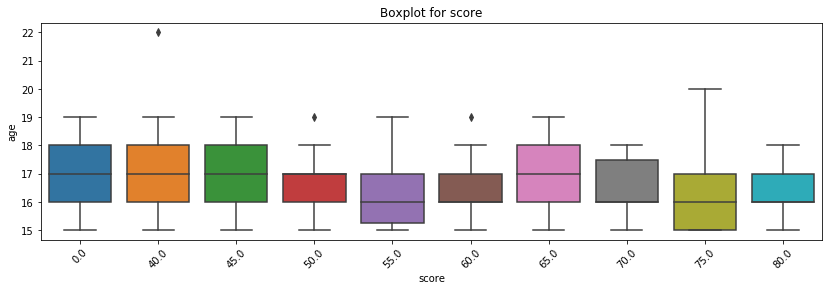

In [17]:
for col in ['traveltime', 'studytime', 'failures', 'studytime_granular', 'famrel', 'goout', 'health', 'score']:
    get_boxplot(col)

In [18]:
pd.DataFrame(stud_math.school.value_counts())


,school
GP,318
MS,43


In [19]:
pd.DataFrame(stud_math.sex.value_counts())

,sex
F,188
M,173


In [20]:
pd.DataFrame(stud_math.address.value_counts())


,address
U,269
R,78


In [21]:
pd.DataFrame(stud_math.famsize.value_counts())

,famsize
GT3,240
LE3,99


In [22]:
pd.DataFrame(stud_math.Pstatus.value_counts())

,Pstatus
T,291
A,32


In [23]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [25]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
                     'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'studytime_granular',
                     'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки absences
Найдены статистически значимые различия для колонки score


In [28]:
stud_math_for_model = stud_math.loc[:, ['school', 'age', 'famsize', 'Pstatus', 'Fedu', 'Fjob', 'reason', 'guardian',
                     'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'studytime_granular',
                     'internet', 'famrel', 'freetime', 'goout', 'health']]
stud_math_for_model.head()

,school,age,famsize,Pstatus,Fedu,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,studytime_granular,internet,famrel,freetime,goout,health
0,GP,18,NaN,A,4.0,teacher,course,mother,2.0,2.0,yes,no,no,no,yes,-6.0,NaN,4.0,3.0,4.0,3.0
1,GP,17,GT3,NaN,1.0,other,course,father,1.0,2.0,no,yes,no,no,no,-6.0,yes,5.0,3.0,3.0,3.0
2,GP,15,LE3,T,1.0,other,other,mother,1.0,2.0,yes,no,NaN,no,yes,-6.0,yes,4.0,3.0,2.0,3.0
3,GP,15,GT3,T,2.0,NaN,home,mother,1.0,3.0,no,yes,yes,yes,yes,-9.0,yes,3.0,2.0,2.0,5.0
4,GP,16,GT3,T,3.0,other,home,father,1.0,2.0,no,yes,yes,no,yes,-6.0,no,4.0,3.0,2.0,5.0


In [27]:
# В данных достаточно мало пустых значений.
# Выбросы найдены только в столбце пропусков занятий, что позволяет сделать вывод о том, что данные достаточно чистые.
# Корреляция параметра Medu и Fedu может говорить о том, что образование родителей влияет на образование детей,
# studytime_granular и freetime некоторые ученики в после школы дополнительно занимаются,
# а вот проведение больше времени с друзьями плохо влияет на посещаемость и результат.
# Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это 'school', 'age', 'famsize', 'Pstatus', 'Fedu', 'Fjob', 'reason', 'guardian',
                     'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'studytime_granular',
                     'internet', 'famrel', 'freetime', 'goout', 'health'.